# Select Best Model And Hypertuning Using GridSearchCv
Author: Kim Hazed Delfino

## Logistic, Random Forest, or KNN? 

### Imports

In [223]:
import pandas as pd
import numpy as np
# Libraries for plotting visuals
import matplotlib.pyplot as plt
import seaborn as sns
# Necessary Libraries 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
# Score metrics 
from sklearn.metrics import accuracy_score, precision_score, classification_report
# New line for .metrics for readability
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Load the Data

In [224]:
path = r"C:\Users\kdelfino\Documents\GitHub\GridSearchCV\wisconsinBreastCancer - wisconsinBreastCancer.csv"
df = pd.read_csv(path)

### Exploratory Data Analysis 

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [226]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [227]:
df.duplicated().sum()

0

- Data has no missing values or duplicate and all in float value except for the target column


### Assign Feature Matrices and Target Vector

In [228]:
# Train Test Split 
X = df.drop(columns=["diagnosis", "id"])
y = df["diagnosis"]
# Convert target value into binary 
y.replace({"M":1, "B": 0},inplace=True)
X_train, X_test , y_train , y_test = train_test_split(X,y, random_state=42 )
# Double check target values 
y.sample(10)

466    0
238    0
14     1
411    0
335    1
490    0
533    1
134    1
493    0
279    0
Name: diagnosis, dtype: int64

### Preprocessing 

In [229]:
# Instantiate scaler
scaler = StandardScaler()

#### Create Custom Class to Instantiate and Train Models and Reports visuals

In [230]:
class ClfMetrics:
    def __init__(self, model, X_train, X_test, y_train, y_test, 
                 labels):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test 
        self.labels = labels

        # Train model 
        scaler = StandardScaler()
        self.model_pipe = make_pipeline(scaler,model)
        self.model_pipe.fit(X_train,y_train)
        # set hyperparams 
        self.show_params = self.model_pipe.get_params()
        # set prediction
        self.model_train_pred = self.model_pipe.predict(X_train)
        self.model_test_pred = self.model_pipe.predict(X_test)
        # set classfication report
        self.train_dt_report = classification_report(y_train,self.model_train_pred,
                                                target_names=labels)
        self.test_dt_report = classification_report(y_test, self.model_test_pred,
                                            target_names=labels)
        
    # Display Confusion Report 
    def get_train_report(self):
        return print(f"{self.model} Train Metric Scores: \n {self.train_dt_report}")

    def get_test_report(self):    
        return print(f"{self.model} Test Metric Scores: \n {self.test_dt_report}")

    def get_visuals(self, normalize = None):
        # Display Confusion Matrix
        fig, axes = plt.subplots(ncols= 2, figsize=(10,5))
        ConfusionMatrixDisplay.from_predictions(self.y_train, 
                                                self.model_train_pred,
                                                ax=axes[0],
                                                cmap="Blues",
                                                normalize=normalize)
        axes[0].set_title("Train CM")
          
        ConfusionMatrixDisplay.from_predictions(self.y_test, 
                                                self.model_test_pred,
                                                ax=axes[1],
                                                cmap="Reds",
                                                normalize=normalize)
        axes[1].set_title("Test CM")
        
        return plt.show()
        
    def run_gs(self,param_matrix:dict) -> dict:
        gs_pipe = GridSearchCV(self.model_pipe,param_matrix)
        gs_pipe.fit(X_train, y_train)
        print(f"Accuracy : {round(gs_pipe.best_estimator_.score(X_test,y_test)*100,2)}")
        print(self.model)
        return gs_pipe.best_params_

    



## Logistic Regression

### Instantiate and train model

In [231]:
labels = ["Benign","Malignant" ]
# Instantiate logreg model with default params 
logreg = ClfMetrics(LogisticRegression(solver="liblinear"), X_train, X_test, y_train, y_test, labels)

In [232]:
# Show reports
logreg.get_test_report()
logreg.get_train_report()

LogisticRegression(solver='liblinear') Test Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.99      0.98      0.98        89
   Malignant       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

LogisticRegression(solver='liblinear') Train Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       268
   Malignant       0.99      0.97      0.98       158

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426



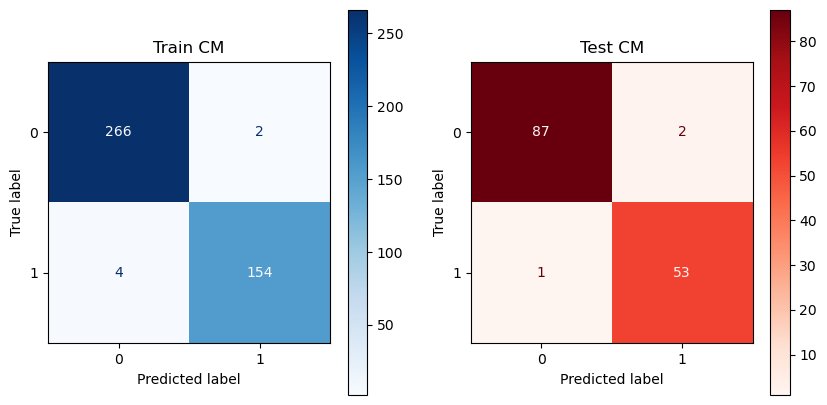

In [233]:
# Show CM Visuals 
logreg.get_visuals()

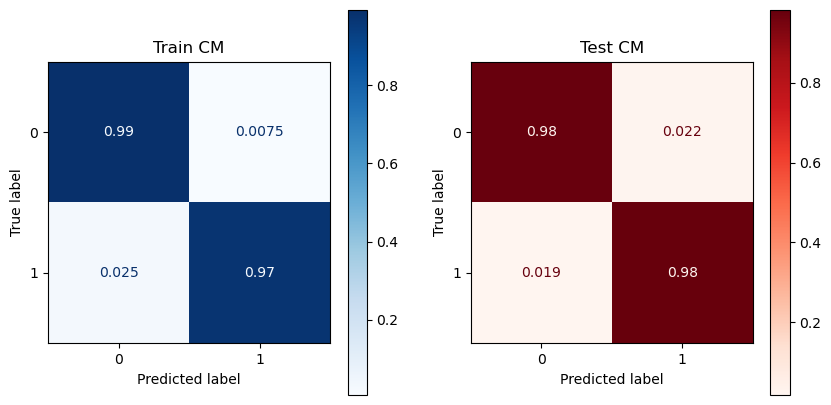

In [234]:
# Show CM Visuals with normalize = true
logreg.get_visuals(normalize="true")

- Here we can see that `Logistic Regression` model did pretty well with just default param
- Only `2.5%` `False Negative` which what we care the most 
- Now let's see if we can improve this score by hyperparameter tuning 

### Hyperpameter Tuning - Logistic Regression

In [235]:
# Show params for hyperparam tuning
logreg.show_params

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(solver='liblinear'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(solver='liblinear'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [236]:
lr_param_matrix = {
    'logisticregression__penalty':["l1", "l2"],
    'logisticregression__C' : [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]
                   }

logreg.run_gs(lr_param_matrix)

Accuracy : 97.9
LogisticRegression(solver='liblinear')


{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

- Here we can see that `GridSearchCV` returns the `Best params` to use for our model 
- `BUT` these hyperparameters are already the same values as `default` params 
- So it's not necessary to Instantiate another model with `Best params`

## K-Nearest-Neighbors 

In [237]:
# Instantiate KNN model
knn =  ClfMetrics(KNeighborsClassifier(), X_train, X_test, y_train, y_test, labels)

In [238]:
# Show reports
knn.get_test_report()
knn.get_train_report()

KNeighborsClassifier() Test Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        89
   Malignant       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

KNeighborsClassifier() Train Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.97      1.00      0.98       268
   Malignant       1.00      0.94      0.97       158

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426



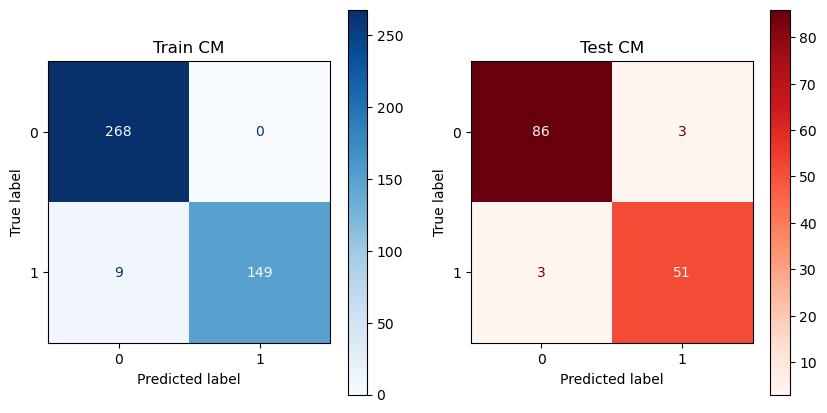

In [239]:
# Show CM Visuals
knn.get_visuals()

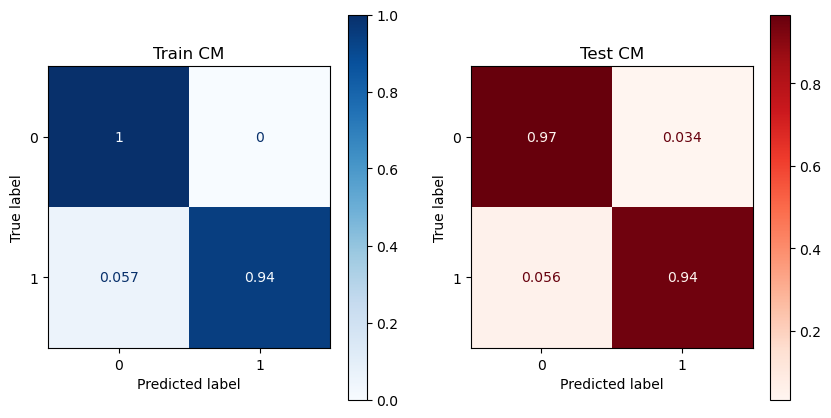

In [240]:
# Show CM Visuals with normalize = true
knn.get_visuals(normalize="true")

- Here we can see that `KNN` model did little worse than `Logistic Regression`
- KNN `False Negatively predicted 5.7%` of people in our train dataset which is really bad
- Let's see if we can improve these scores by tuning hyperparameters 



### Hyperparameter Tuning - KNN

In [241]:
# Show parameters for KNN
knn.show_params

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [242]:
# Set hyperparams
leaf_size = list(range(1,25))
n_neighbors = list(range(1,15))
p=[1,2]
knn_param_matrix = {
    'kneighborsclassifier__leaf_size': leaf_size,
    'kneighborsclassifier__n_neighbors': n_neighbors,
    'kneighborsclassifier__p': p
}

In [243]:
# Get Best params using GridSearchCV
knn.run_gs(knn_param_matrix)

Accuracy : 97.2
KNeighborsClassifier()


{'kneighborsclassifier__leaf_size': 1,
 'kneighborsclassifier__n_neighbors': 3,
 'kneighborsclassifier__p': 1}

In [244]:
# Instantiate new KNN model with tuned hyperparameter
best_knn = knn =  ClfMetrics(KNeighborsClassifier(leaf_size=1, 
                                                  n_neighbors=3,
                                                  p=1
                                                  ),
                              X_train, X_test, y_train, y_test, labels)

In [245]:
# Show scores 
best_knn.get_test_report()
best_knn.get_train_report()

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1) Test Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        89
   Malignant       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1) Train Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       268
   Malignant       1.00      0.97      0.99       158

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



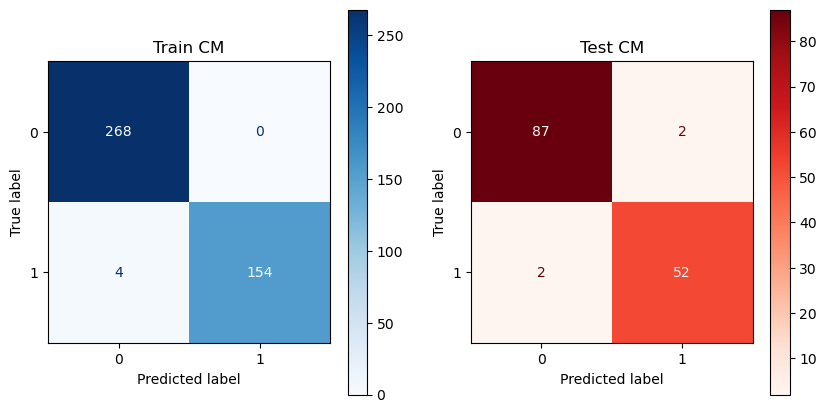

In [246]:
#Show CM Visuals
best_knn.get_visuals()

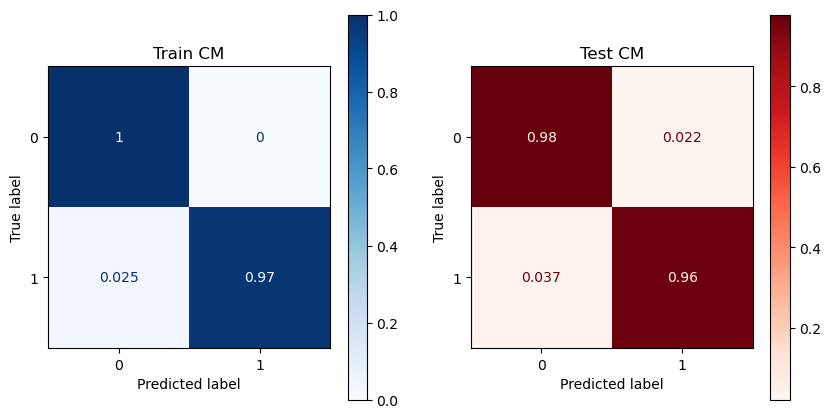

In [247]:
#Show CM Visuals with normalize = true
best_knn.get_visuals(normalize='true')

- Here we can see that `Tuned KNN` did a little better than default params
- However, `Logistic Regression` still have superior results so far. 
- Now for our final model , let's try RandomForest

## RandomForest Classifier

In [248]:
# Instantiate the RF model with default params
rf = ClfMetrics(RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test, labels)

In [249]:
# Show reports
rf.get_test_report()
rf.get_train_report()

RandomForestClassifier(random_state=42) Test Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.97      0.98      0.97        89
   Malignant       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

RandomForestClassifier(random_state=42) Train Metric Scores: 
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       268
   Malignant       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



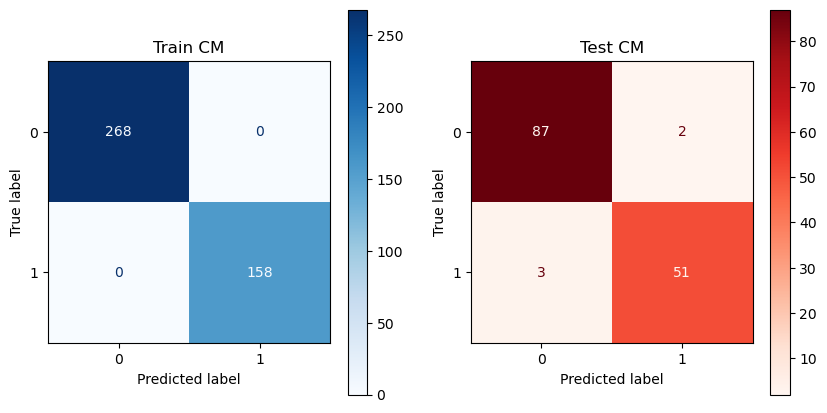

In [250]:
# Show CM Visuals
rf.get_visuals()

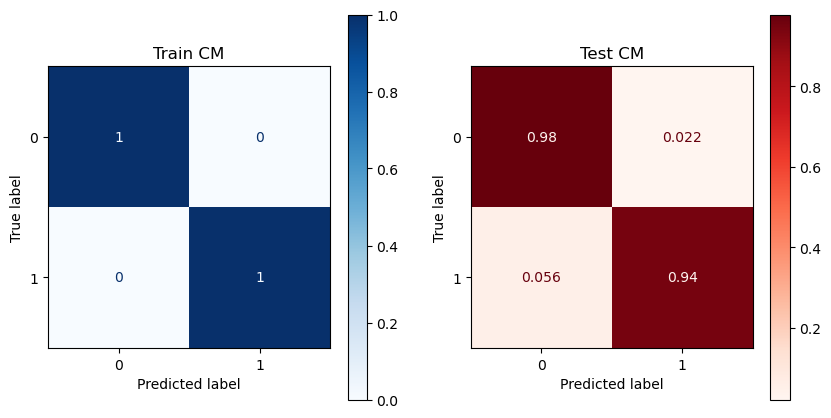

In [251]:
# Show CM visuals with normalize = true
rf.get_visuals(normalize='true')

 - Here we can see that `RF model` did really well on train dataset but got some errors on test dataset predictions
 - So far `Logistic Regressor` still holds the lowest `False Negative` score
 - Let's see if we can improve our RF model by tuning Hyperparameters

### Hyperparameter Tuning - RandomForest Classifier

In [252]:
# Show tuning param options 
rf.show_params

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomfore

In [287]:
# Set hyperparams for tuning with GridSearchCV
rf_param_matrix = {'randomforestclassifier__max_depth': [1,2,3,4,5],
                    'randomforestclassifier__min_samples_leaf': [1, 2, 3],
                    'randomforestclassifier__min_samples_split': [2,4,6,8]
                    }


In [288]:
# get best hyperparams using GridSearchCV
rf.run_gs(rf_param_matrix)

Accuracy : 97.2
RandomForestClassifier(random_state=42)


{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 8}

In [289]:
# Instantiate new RF model with tuned hyperparams
best_rf = ClfMetrics(RandomForestClassifier(max_depth= 5,min_samples_leaf=3,min_samples_split=8, random_state=42), X_train, X_test, y_train, y_test, labels)

In [290]:
# Show reports
best_rf.get_test_report()
best_rf.get_train_report()

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=8,
                       random_state=42) Test Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        89
   Malignant       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=8,
                       random_state=42) Train Metric Scores: 
               precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       268
   Malignant       0.99      0.97      0.98       158

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



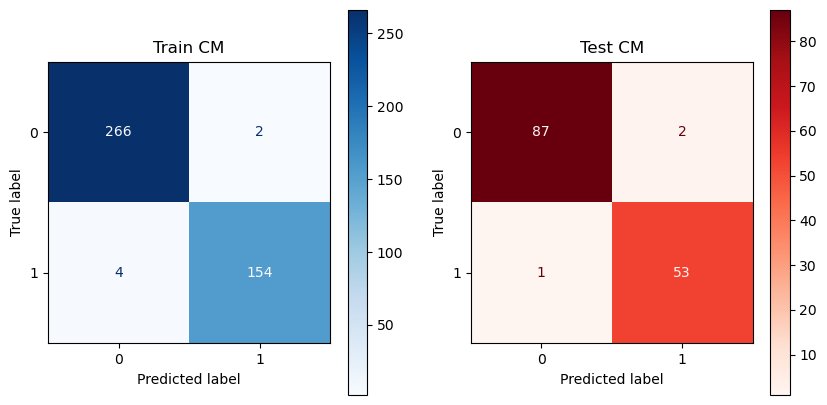

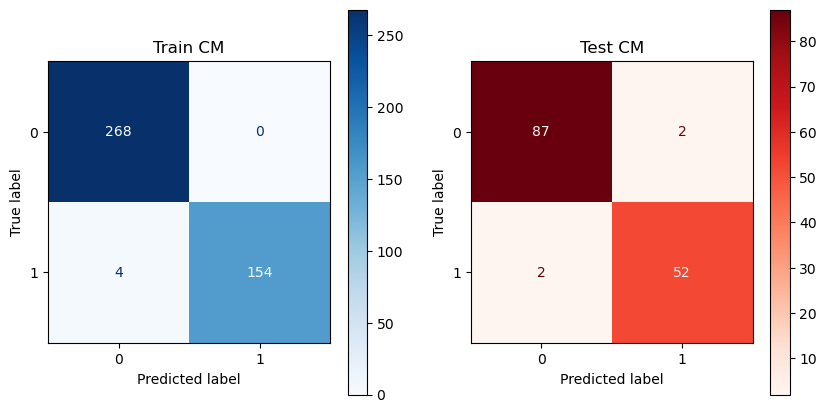

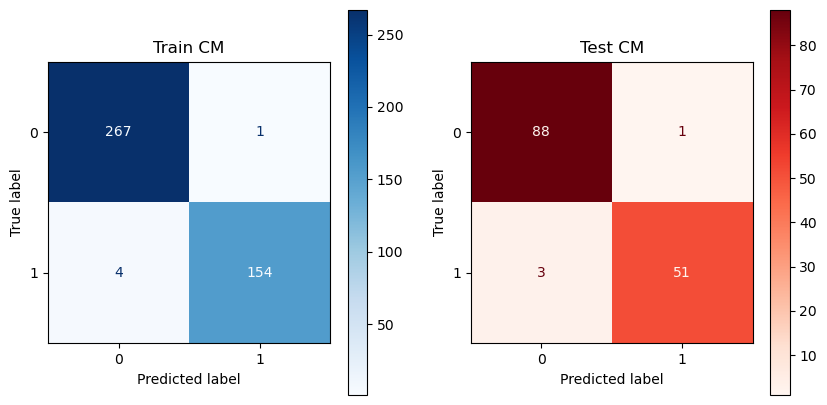

In [293]:
# Show visuals for all model
logreg.get_visuals()
best_knn.get_visuals()
best_rf.get_visuals()

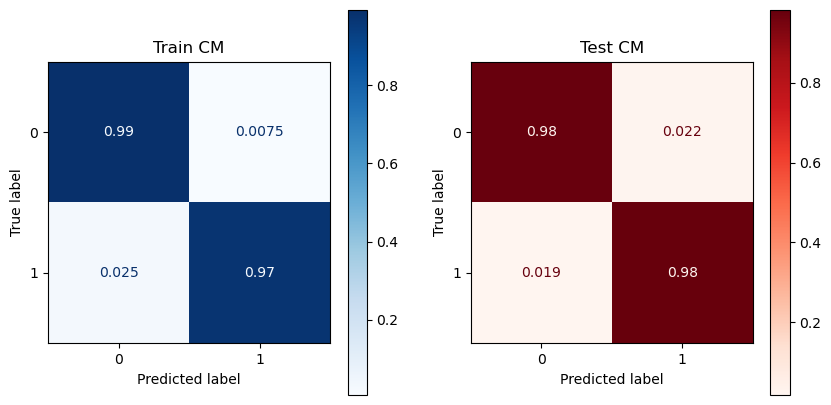

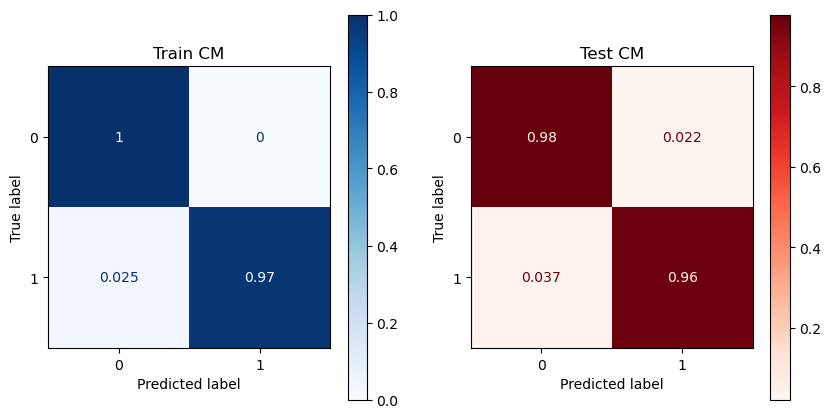

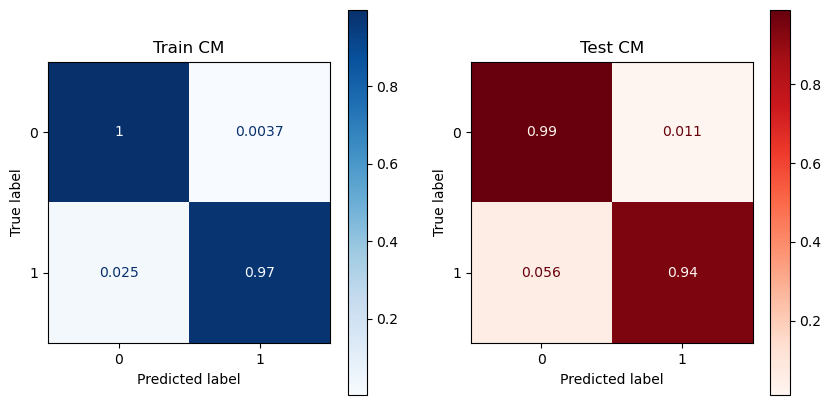

In [292]:
# Show CM visuals with normalize = true for all models
logreg.get_visuals(normalize='true')
best_knn.get_visuals(normalize='true')
best_rf.get_visuals(normalize='true')

- with this Dataset we care most about `False Negative` prediction since we don't want any ill patient to not get proper treatment. 
- Overall I would recommend using `Logistic Regression` with `Default Params`
- This model yielded least amount of `False Negative Predictions`
